<a href="https://colab.research.google.com/github/mortarialex/cienciadedados2/blob/main/cd2_2503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CIÊNCIA DE DADOS 2** (25/03)
**Amostragem** - subconjuntos de dados para agilizar o treinamento e simplificar a geração de modelo
 - *simples*: sem viés
    - risco de amostras desbalanceadas
    - pode subrepresentar classes minoritárias

 - *estratificada*: garante proporções

**Normalização** - uniformizar os valores; recomendável quando os limites de valores de atributos distintos são muito distintos

  - *reescala*: nova escala, mínimos e máximos
    - quando precisar de dados em escala fixa e sem outliers extermos

  - *padronização*: valor central e valor de espalhamento
    - dados com outliers ou algoritmo com normalidade




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataCancer = pd.read_csv('breast_cancer_custom.csv')
dataCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                609 non-null    int64  
 1   mean_radius              607 non-null    float64
 2   mean_texture             609 non-null    float64
 3   mean_perimeter           609 non-null    float64
 4   mean_area                609 non-null    float64
 5   mean_smoothness          608 non-null    float64
 6   mean_compactness         609 non-null    float64
 7   mean_concavity           609 non-null    float64
 8   mean_concave_points      609 non-null    float64
 9   mean_symmetry            609 non-null    float64
 10  mean_fractal_dimension   609 non-null    float64
 11  radius_error             609 non-null    float64
 12  texture_error            609 non-null    float64
 13  perimeter_error          609 non-null    float64
 14  area_error               6

In [ ]:
cmc = pd.read_csv('cmc.csv')
cmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   wife_age                   1473 non-null   int64
 1   wife_education             1473 non-null   int64
 2   husband_education          1473 non-null   int64
 3   num_children               1473 non-null   int64
 4   wife_religion              1473 non-null   int64
 5   wife_working_now           1473 non-null   int64
 6   husband_occupation         1473 non-null   int64
 7   std_living_index           1473 non-null   int64
 8   media_exposure             1473 non-null   int64
 9   contraceptive_method_used  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [ ]:
dataCancer.head()

# worst_area tem valores discrepantes do resto

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,9012315,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,...,31.03,129.30,1165.0,0.1415,0.4665,0.70870,0.22480,0.4824,0.09614,malignant
1,88147102,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,...,19.31,114.20,808.2,0.1136,0.3627,0.34020,0.13790,0.2954,0.08362,benign
2,879523,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740,malignant
3,862717,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,...,35.27,108.60,906.5,0.1265,0.1943,0.31690,0.11840,0.2651,0.07397,malignant
4,9112085,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,...,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675,benign


In [ ]:
# sample_id não tem função nesse caso, podemos remover

del dataCancer['sample_id']
dataCancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,0.2175,0.06218,...,31.03,129.30,1165.0,0.1415,0.4665,0.70870,0.22480,0.4824,0.09614,malignant
1,15.00,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,0.05907,...,19.31,114.20,808.2,0.1136,0.3627,0.34020,0.13790,0.2954,0.08362,benign
2,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740,malignant
3,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,35.27,108.60,906.5,0.1265,0.1943,0.31690,0.11840,0.2651,0.07397,malignant
4,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675,benign


In [ ]:
# verificar quantos nulos existem em cada coluna

dataCancer.isnull().sum()

,0
mean_radius,2
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,1
mean_compactness,0
mean_concavity,0
mean_concave_points,0
mean_symmetry,0
mean_fractal_dimension,0


In [ ]:
# dropar colunas com itens nulos

dataWtNan = dataCancer.copy()
dataWtNan = dataWtNan.dropna()
dataWtNan.info()

# numero cai de 608 para 600

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 607
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              600 non-null    float64
 1   mean_texture             600 non-null    float64
 2   mean_perimeter           600 non-null    float64
 3   mean_area                600 non-null    float64
 4   mean_smoothness          600 non-null    float64
 5   mean_compactness         600 non-null    float64
 6   mean_concavity           600 non-null    float64
 7   mean_concave_points      600 non-null    float64
 8   mean_symmetry            600 non-null    float64
 9   mean_fractal_dimension   600 non-null    float64
 10  radius_error             600 non-null    float64
 11  texture_error            600 non-null    float64
 12  perimeter_error          600 non-null    float64
 13  area_error               600 non-null    float64
 14  smoothness_error         600 no

In [ ]:
# preenchendo os valores

# 1 encontrar colunas com nan

nanColumns = [col for col in dataCancer.columns if dataCancer[col].isnull().any()]
print(nanColumns)

['mean_radius', 'mean_smoothness', 'worst_perimeter', 'worst_concave_points', 'worst_fractal_dimension']


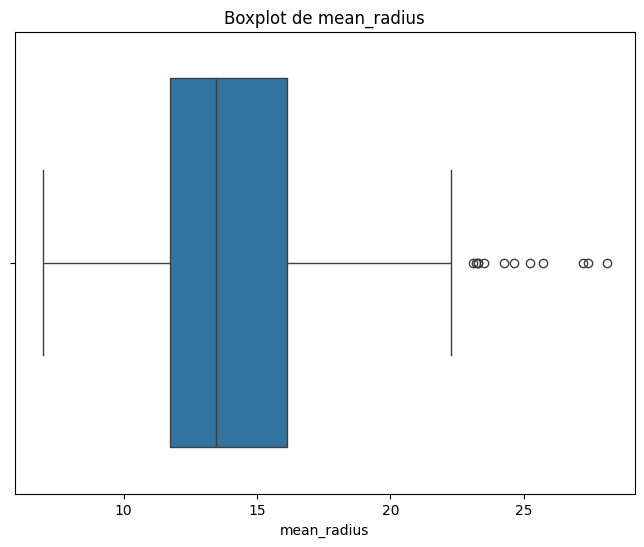

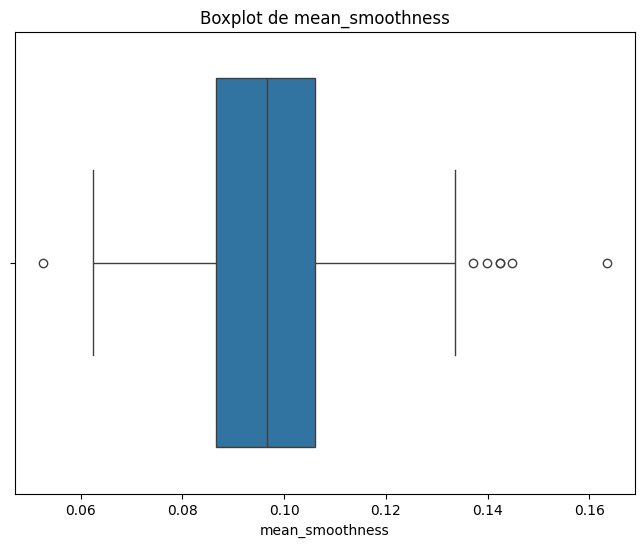

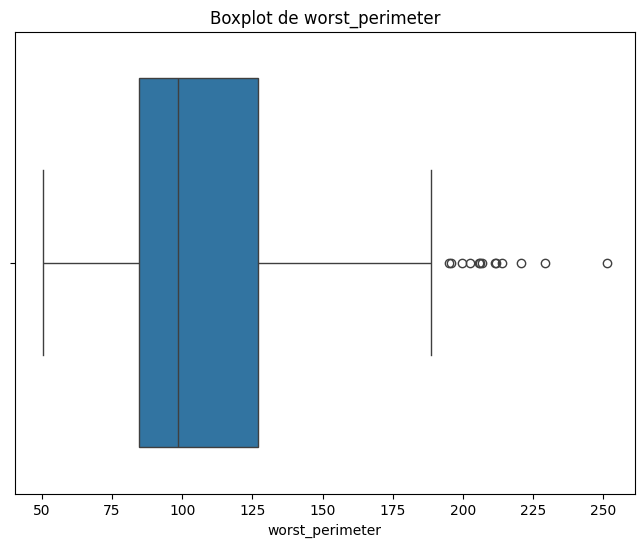

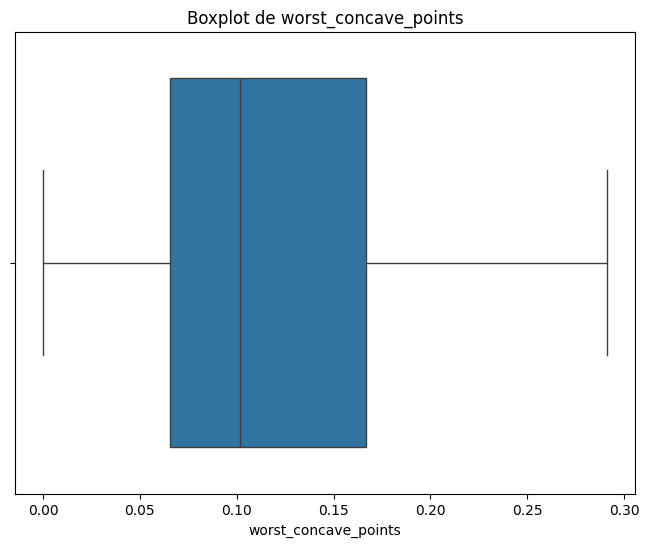

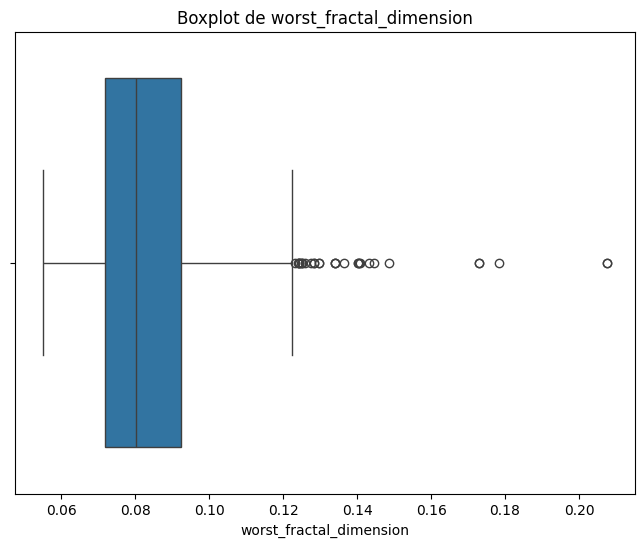

In [ ]:
# 2 escolher entre media ou mediana (descobrir a distribuição dos dados)

for column in nanColumns:
  plt.figure(figsize=(8,6))
  sns.boxplot(x = dataCancer[column])
  plt.title(f'Boxplot de {column}')

# nota-se outliers e a distribuição dos dados, no caso, assimétrica

<Axes: xlabel='worst_concave_points', ylabel='Count'>

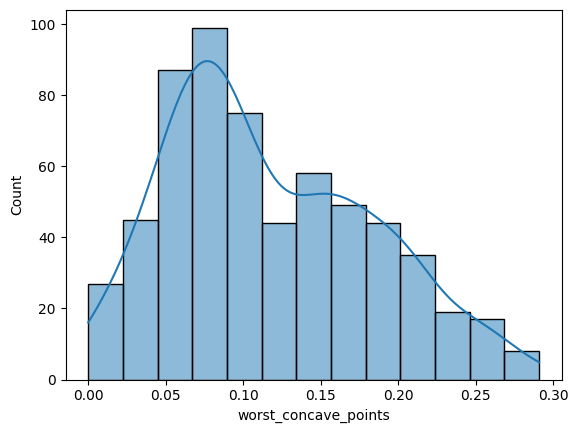

In [ ]:
sns.histplot(dataCancer['worst_concave_points'], kde = True)

# escolhida por ter menos outliers

In [ ]:
# 3 preenchendo as colunas com os valores
for column in nanColumns:
  median = dataCancer[column].median()
  print(f'Coluna: {column}')
  dataCancer[column] = dataCancer[column].fillna(median)

Coluna: mean_radius
Coluna: mean_smoothness
Coluna: worst_perimeter
Coluna: worst_concave_points
Coluna: worst_fractal_dimension


In [ ]:
dataCancer.info()

# todos os valores foram preenchidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              609 non-null    float64
 1   mean_texture             609 non-null    float64
 2   mean_perimeter           609 non-null    float64
 3   mean_area                609 non-null    float64
 4   mean_smoothness          609 non-null    float64
 5   mean_compactness         609 non-null    float64
 6   mean_concavity           609 non-null    float64
 7   mean_concave_points      609 non-null    float64
 8   mean_symmetry            609 non-null    float64
 9   mean_fractal_dimension   609 non-null    float64
 10  radius_error             609 non-null    float64
 11  texture_error            609 non-null    float64
 12  perimeter_error          609 non-null    float64
 13  area_error               609 non-null    float64
 14  smoothness_error         6

In [ ]:
# 4 detecção de dados redundantes

dataCancer.duplicated().sum()

np.int64(25)

In [ ]:
# remoção de linhas duplicadas

dataCancer = dataCancer.drop_duplicates()
dataCancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 0 to 608
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              584 non-null    float64
 1   mean_texture             584 non-null    float64
 2   mean_perimeter           584 non-null    float64
 3   mean_area                584 non-null    float64
 4   mean_smoothness          584 non-null    float64
 5   mean_compactness         584 non-null    float64
 6   mean_concavity           584 non-null    float64
 7   mean_concave_points      584 non-null    float64
 8   mean_symmetry            584 non-null    float64
 9   mean_fractal_dimension   584 non-null    float64
 10  radius_error             584 non-null    float64
 11  texture_error            584 non-null    float64
 12  perimeter_error          584 non-null    float64
 13  area_error               584 non-null    float64
 14  smoothness_error         584 no

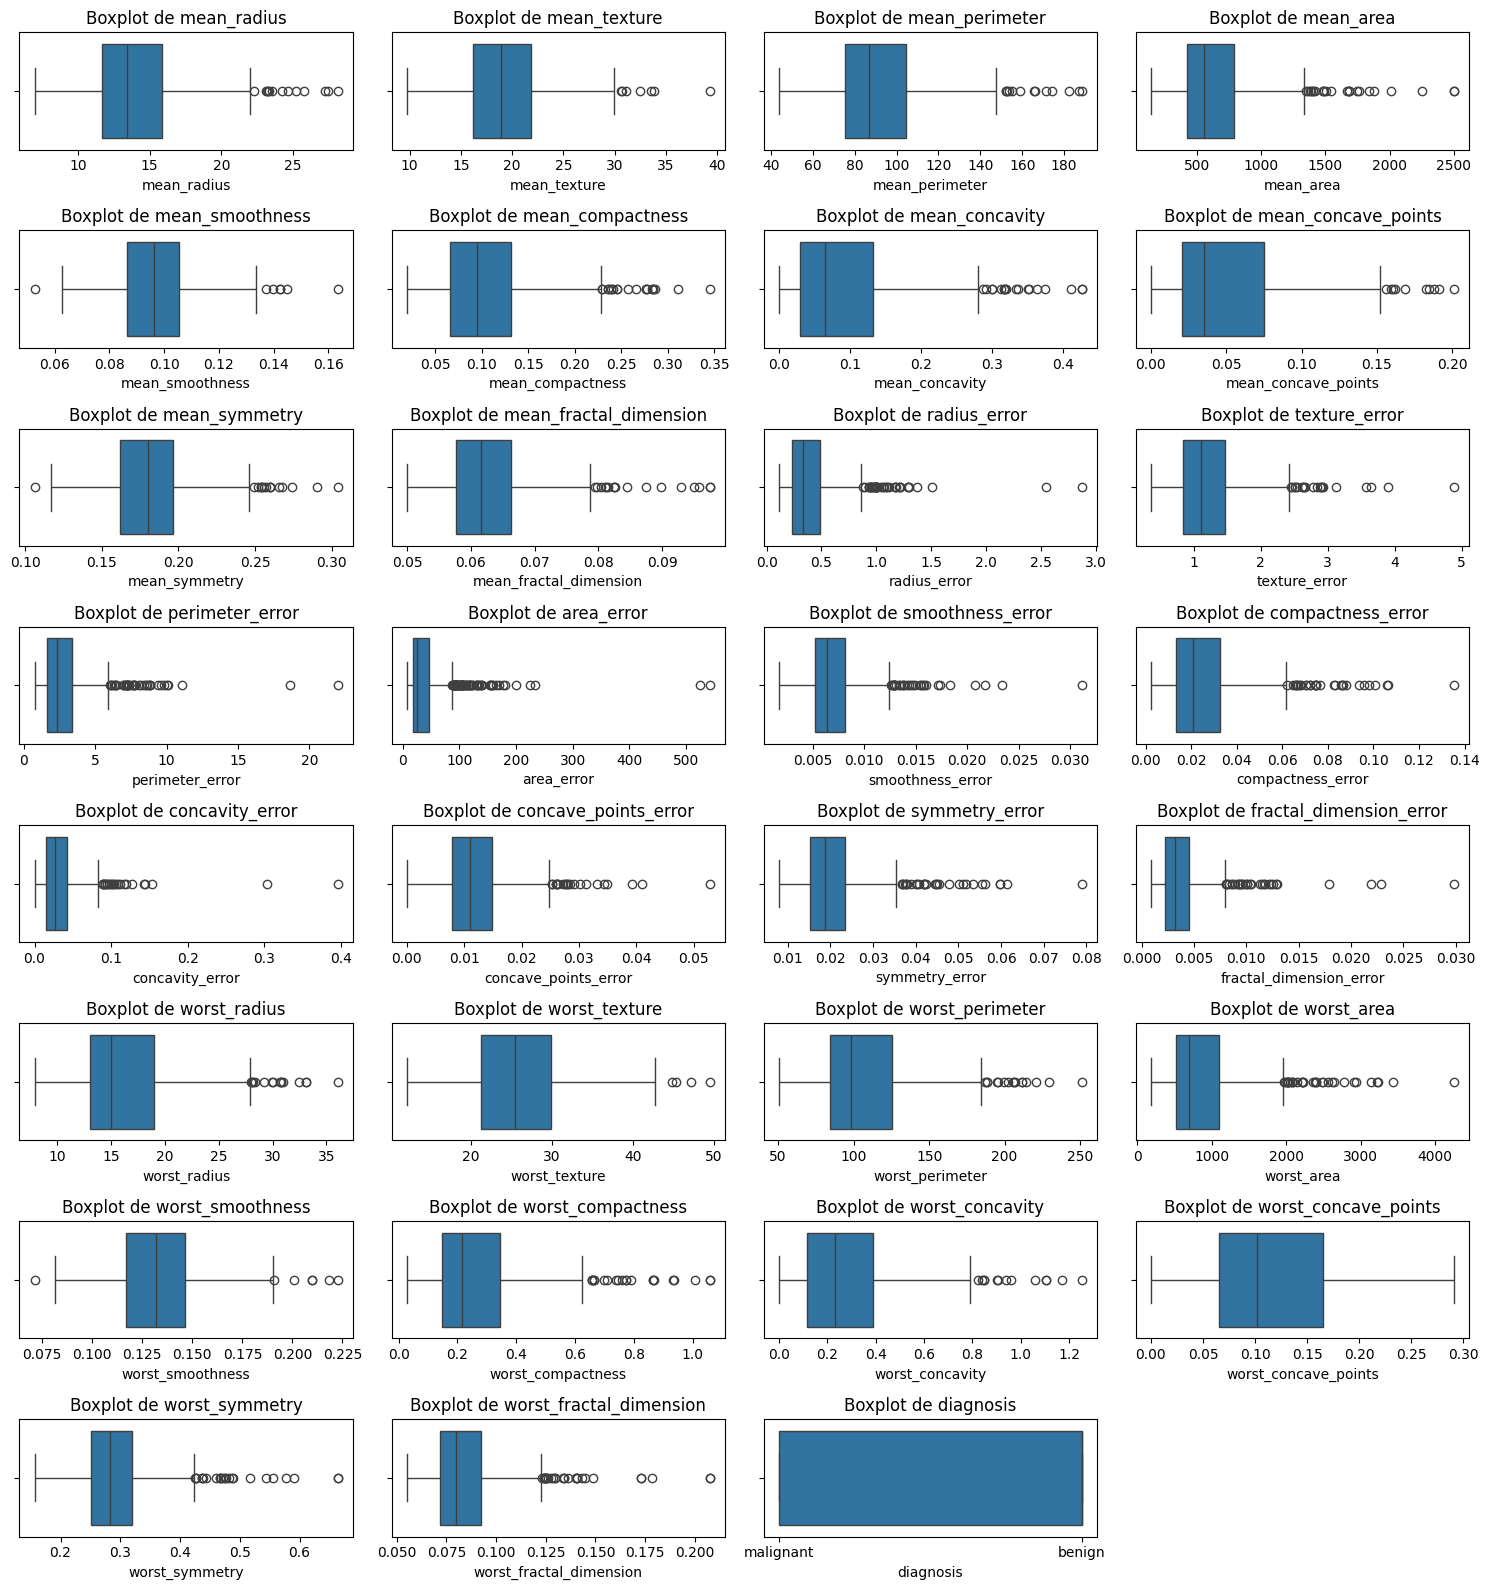

In [ ]:
# prompt: gerar os boxplots das colunas de dataCancer em 4 colunas

import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'dataCancer' seja seu DataFrame
# Criar uma figura com subplots em 4 colunas
num_cols = 4
num_rows = (len(dataCancer.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 2 * num_rows))

# Iterar sobre as colunas e gerar os boxplots
for i, column in enumerate(dataCancer.columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=dataCancer[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot de {column}')

# Remover os subplots extras, se houver
for i in range(len(dataCancer.columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])


# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()


In [ ]:
# descobrir qual atribute tem mais outlier